In [2]:
from datetime import datetime
from datetime import timezone
import polars as pl
import os
import glob
from utils.plot_data import plot_sensor_measurement, plot_wind_rose, plot_co2_rose


start_date = datetime(2024, 12, 8, 0, 0, 0).replace(tzinfo=timezone.utc)
end_date = datetime(2024, 12 ,18, 23, 59, 59).replace(tzinfo=timezone.utc)

filter = '1h'

sensor_id = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
sensor_id = [16]


DATA_DIRECTORY = os.environ.get("DATA_DIRECTORY")

# processed 10min average measurement data
df = pl.scan_parquet(os.path.join(DATA_DIRECTORY, "processed", "pipeline", "calibrated_1_min_acropolis.parquet")).filter(pl.col("creation_timestamp").is_between(start_date, end_date)).collect()


In [3]:
raw = True

# raw data
# load all local chunks for 2024
if raw:
    year = 2024
    measurement_months = []

    paths = sorted(glob.glob(os.path.join(DATA_DIRECTORY, "download", "measurements", str(year), "*.parquet")), key=os.path.getmtime)

    for path in paths:
        measurement_months.append(pl.scan_parquet(path))

    df_raw = pl.concat(measurement_months, how="diagonal") \
        .filter(pl.col("creation_timestamp").is_between(start_date, end_date)) \
        .collect() \
        .filter(pl.col("system_name") != "test-sensor")

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="enclosure_bme280_humidity",filter=filter)

In [5]:
plot_sensor_measurement(df,sensor_id,col_name="gmp343_temperature",filter='1m')

In [6]:
plot_sensor_measurement(df,sensor_id=sensor_id,col_name="gmp343_corrected",filter='1m')

In [ ]:
plot_sensor_measurement(df,sensor_id=sensor_id,col_name="wxt532_speed_avg",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="sht45_humidity",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="h2o_v%",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="bme280_humidity",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="bme280_h2o_v%",filter=filter)

In [ ]:
df_plot = df_raw.with_columns(diff_inflow_humidity = (pl.col("sht45_humidity") - pl.col("bme280_humidity"))) \
    .filter(pl.col("diff_inflow_humidity").is_not_nan()) \
    .select("creation_timestamp", "diff_inflow_humidity", "system_id") \
    .sort("system_id")
    
plot_sensor_measurement(df_plot,sensor_id,col_name="diff_inflow_humidity",filter=filter)

In [ ]:
df_plot = df.with_columns(diff_inflow_humidity = (pl.col("h2o_v%") - pl.col("bme280_h2o_v%"))) \
    .filter(pl.col("diff_inflow_humidity").is_not_nan()) \
    .select("creation_timestamp", "diff_inflow_humidity", "system_id") \
    .sort("system_id")
    
plot_sensor_measurement(df_plot,sensor_id,col_name="diff_inflow_humidity",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="sht45_temperature",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="bme280_temperature",filter=filter)

In [ ]:
df_plot = df_raw.with_columns(diff_inflow_temperature = (pl.col("sht45_temperature") - pl.col("bme280_temperature"))) \
    .filter(pl.col("diff_inflow_temperature").is_not_nan()) \
    .select("creation_timestamp", "diff_inflow_temperature", "system_id") \
    .sort("system_id")
    
plot_sensor_measurement(df_plot,sensor_id,col_name="diff_inflow_temperature",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="bme280_pressure",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="enclosure_bme280_temperature",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id=sensor_id,col_name="gmp343_raw",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="gmp343_compensated",filter=filter)

In [10]:
plot_sensor_measurement(df,sensor_id,col_name="wxt532_temperature",filter=filter)

In [10]:
# KLEG
plot_co2_rose(df, 1, 'Klenze Gymnasium')

# X
#plot_co2_rose(df, 2, 'X')

# X
#plot_co2_rose(df, 3, 'X')

# X
#plot_co2_rose(df, 4, 'X')

# DLRO
plot_co2_rose(df, 5, 'DLR')

# TUMN
plot_co2_rose(df, 6, 'TUM')

# FB85
#plot_co2_rose(df, 7, 'Blutenburgturm 85m')

# KRDI
plot_co2_rose(df, 8, 'Klinikum Rechts-der-Isar')

# KNPL
plot_co2_rose(df, 9, 'Klinikum Neuperlach')

# SWGG
plot_co2_rose(df, 10, 'Städtisches Willi Graf Gymnasium')

# RFIN
plot_co2_rose(df, 11, 'Rathaus Finsing')

# WKRT
plot_co2_rose(df, 12, 'Walter-Klingenbeck-Realschule')

# RFEL
plot_co2_rose(df, 13, 'Rathaus Feldkirchen')

# FB48
#plot_co2_rose(df, 14, 'Blutenburgturm 48m')

# SWMZ
plot_co2_rose(df, 15, 'Stadtwerke München Zentrale')

# SMAI
plot_co2_rose(df, 16, 'Schule Maisach')

# KBOG
#plot_co2_rose(df, 17, 'Klinikum Bogenhausen')

# SBBG
plot_co2_rose(df, 18, 'Städtisches Bertolt Brecht Gymnasium')

# X
#plot_o2_rose(df, 19, 'X')

# LGRO
plot_co2_rose(df, 20, 'LMU Großhadern')



In [ ]:
# KLEG
plot_wind_rose(df, 1, 'Klenze Gymnasium')

# X
#plot_wind_rose(df, 2, 'X')

# X
#plot_wind_rose(df, 3, 'X')

# X
#plot_wind_rose(df, 4, 'X')

# DLRO
plot_wind_rose(df, 5, 'DLR')

# TUMN
plot_wind_rose(df, 6, 'TUM')

# FB85
#plot_wind_rose(df, 7, 'Blutenburgturm 85m')

# KRDI
plot_wind_rose(df, 8, 'Klinikum Rechts-der-Isar')

# KNPL
plot_wind_rose(df, 9, 'Klinikum Neuperlach')

# SWGG
plot_wind_rose(df, 10, 'Städtisches Willi Graf Gymnasium')

# RFIN
plot_wind_rose(df, 11, 'Rathaus Finsing')

# WKRT
plot_wind_rose(df, 12, 'Walter-Klingenbeck-Realschule')

# RFEL
plot_wind_rose(df, 13, 'Rathaus Feldkirchen')

# FB48
#plot_wind_rose(df, 14, 'Blutenburgturm 48m')

# SWMZ
plot_wind_rose(df, 15, 'Stadtwerke München Zentrale')

# SMAI
plot_wind_rose(df, 16, 'Schule Maisach')

# KBOG
#plot_wind_rose(df, 17, 'Klinikum Bogenhausen')

# SBBG
plot_wind_rose(df, 18, 'Städtisches Bertolt Brecht Gymnasium')

# X
#plot_o2_rose(df, 19, 'X')

# LGRO
plot_wind_rose(df, 20, 'LMU Großhadern')



In [3]:
plot_sensor_measurement(df,sensor_id,col_name="wxt532_direction_avg",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="raspi_cpu_usage",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="raspi_memory_usage",filter=filter)


In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="raspi_disk_usage",filter=filter)


In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="raspi_cpu_temperature",filter=filter)

In [ ]:
plot_sensor_measurement(df,sensor_id,col_name="enclosure_bme280_pressure",filter=filter)

In [ ]:
df_plot = df.with_columns(pl.col("enclosure_bme280_pressure").forward_fill().backward_fill()) \
    .with_columns(measurement_pressure = (pl.col("bme280_pressure") - pl.col("enclosure_bme280_pressure"))) \
    .filter(pl.col("measurement_pressure").is_not_nan()) \
    .select("creation_timestamp", "measurement_pressure", "system_id") \
    .sort("system_id")
    

import matplotlib.pyplot as plt
import polars as pl

for id in sensor_id:
    
    # Filter data for the given system_id
    filtered_df = (
    df_plot.filter(pl.col("system_id") == id)
)

    # Plot using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(
        filtered_df["creation_timestamp"], 
        filtered_df["measurement_pressure"], 
        marker='o', 
        label=f"System {id}"
    )

    # Customize plot
    plt.title(f"Pressure Drop During Measurement for System {id}", fontsize=14)
    plt.xlabel("Timestamp", fontsize=12)
    plt.ylabel("measurement_pressure", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Calibration Data

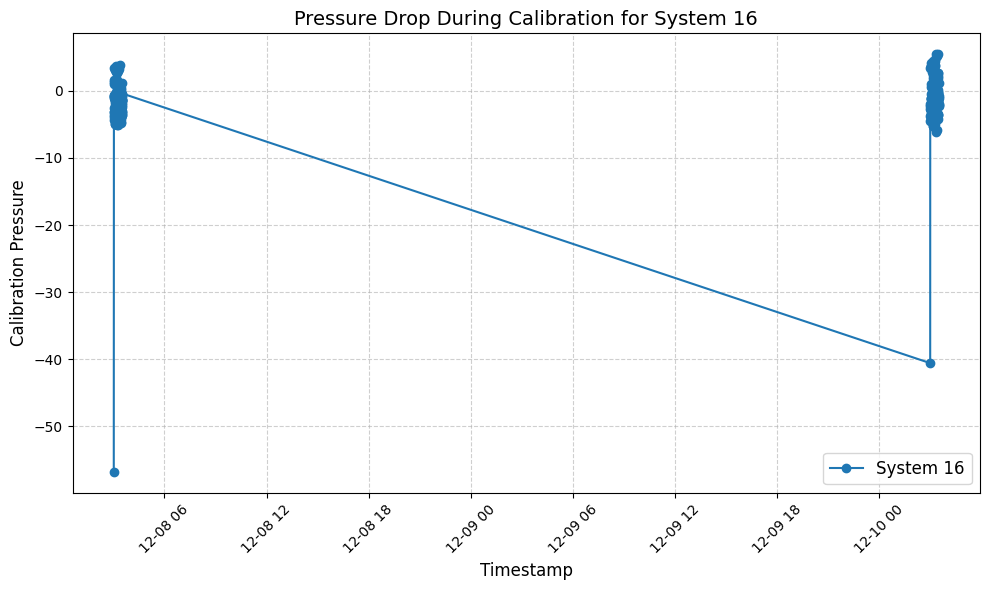

In [7]:
df_plot = df_raw.with_columns(pl.col("enclosure_bme280_pressure").forward_fill().backward_fill()) \
    .with_columns(calibration_pressure = (pl.col("cal_bme280_pressure") - pl.col("enclosure_bme280_pressure"))) \
    .filter(pl.col("calibration_pressure").is_not_nan()) \
    .select("creation_timestamp", "calibration_pressure", "system_id") \
    .sort("system_id")

import matplotlib.pyplot as plt
import polars as pl

for id in sensor_id:
    
    # Filter data for the given system_id
    filtered_df = (
    df_plot.filter(pl.col("system_id") == id)
)

    # Plot using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(
        filtered_df["creation_timestamp"], 
        filtered_df["calibration_pressure"], 
        marker='o', 
        label=f"System {id}"
    )

    # Customize plot
    plt.title(f"Pressure Drop During Calibration for System {id}", fontsize=14)
    plt.xlabel("Timestamp", fontsize=12)
    plt.ylabel("Calibration Pressure", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [8]:
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_bottle_id",filter=None)

In [9]:
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_gmp343_filtered",filter=None)

In [ ]:
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_sht45_humidity",filter=None)

In [ ]:
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_sht45_temperature",filter=None)

In [ ]:
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_gmp343_temperature",filter=None)

In [ ]:
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_bme280_temperature",filter=None)

In [ ]:
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_bme280_humidity",filter=None)

In [ ]:
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_sht45_humidity",filter=None)

In [ ]:
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_bme280_pressure",filter=None)

In [ ]:
# Plot 400ppm Calibration Bottle 
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_gmp343_filtered",filter=None,cut_above= 450,cut_below=350)

In [ ]:
# Plot 800ppm Calibration Bottle 
plot_sensor_measurement(df_raw,sensor_id,col_name="cal_gmp343_filtered",filter=None,cut_below=460)